# Imports

In [1]:
import pathlib
import matplotlib.pyplot as plt

# Constants

In [2]:
PROJECT_DIR = pathlib.Path('~/work').expanduser()
DATA_DIR = PROJECT_DIR / 'data'

In [3]:
# https://archive.ics.uci.edu/ml/datasets/Online+News+Popularity
ONPD_DATA_DIR = DATA_DIR / 'OnlineNewsPopularity'

# Example 2-15

Feature scaling example

In [4]:
import pandas as pd
from sklearn.preprocessing import (MinMaxScaler,
                                   StandardScaler, 
                                   Normalizer)

In [5]:
# Load the Online News Popularity dataset
df = pd.read_csv(
    filepath_or_buffer=ONPD_DATA_DIR / 'OnlineNewsPopularity.csv', 
    delimiter=', ',
    engine='python'
)

In [6]:
# Look at the original data - the number of words in an article
df['n_tokens_content'].values

array([219., 255., 211., ..., 442., 682., 157.])

In [7]:
# Min-max scaling
df['minmax'] = MinMaxScaler().fit_transform(df[['n_tokens_content']])
df['minmax'].values

array([0.02584376, 0.03009205, 0.02489969, ..., 0.05215955, 0.08048147,
       0.01852726])

In [8]:
# Standardization - note that by definition, some outputs will be negative
df['standardized'] = StandardScaler().fit_transform(df[['n_tokens_content']])
df['standardized'].values

array([-0.69521045, -0.61879381, -0.71219192, ..., -0.2218518 ,
        0.28759248, -0.82681689])

In [9]:
# L2-normalization
df['l2_normalized'] = Normalizer().fit_transform(df[['n_tokens_content']].T).reshape(-1, 1)
df['l2_normalized'].values

array([0.00152439, 0.00177498, 0.00146871, ..., 0.00307663, 0.0047472 ,
       0.00109283])

# Example 2-16

Plotting the histograms of original and scaled data

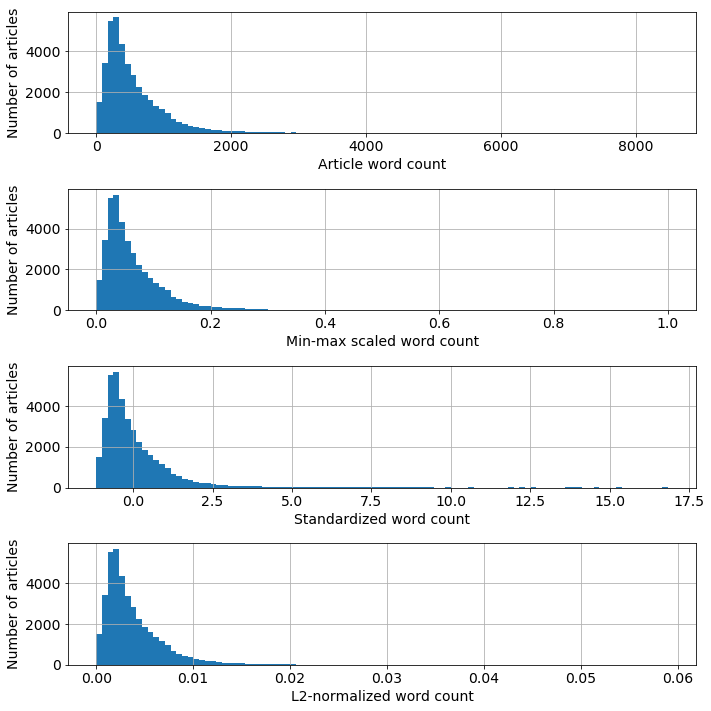

In [10]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 10))

df['n_tokens_content'].hist(ax=ax1, bins=100)
ax1.tick_params(labelsize=14)
ax1.set_xlabel('Article word count', fontsize=14)
ax1.set_ylabel('Number of articles', fontsize=14)

df['minmax'].hist(ax=ax2, bins=100)
ax2.tick_params(labelsize=14)
ax2.set_xlabel('Min-max scaled word count', fontsize=14)
ax2.set_ylabel('Number of articles', fontsize=14)

df['standardized'].hist(ax=ax3, bins=100)
ax3.tick_params(labelsize=14)
ax3.set_xlabel('Standardized word count', fontsize=14)
ax3.set_ylabel('Number of articles', fontsize=14)

df['l2_normalized'].hist(ax=ax4, bins=100)
ax4.tick_params(labelsize=14)
ax4.set_xlabel('L2-normalized word count', fontsize=14)
ax4.set_ylabel('Number of articles', fontsize=14)

plt.tight_layout()
plt.show()